In [1]:
from geopy.distance import great_circle as gr
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.signal import hilbert
import re
import math
from scipy.interpolate import CubicSpline
from geopy.distance import geodesic
import numpy as np
import matlab.engine
en=matlab.engine.start_matlab()
def nextpow2(n):
    return np.ceil(np.log2(np.abs(n))).astype('long')
import matplotlib.pyplot as plt
import matlab
import matlab.engine
en=matlab.engine.start_matlab()
import matlab.engine
from scipy import signal
from scipy.signal import firwin
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
couns=0


import os
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_visible_devices(devices=gpus[0], device_type='GPU')
from tensorflow.keras.models import load_model
modep=load_model(r'C:\Users\a\weights-0-21-0.00041.hdf5')
modeg=load_model(r'C:\Users\a\weights-0-26-0.00040.hdf5')
def EnvelopeImageCalculation(WinWave, fs, TPoint, StaDist):
    alfa = np.array([[0,100,250,500,1000,2000,4000,20000],[5,8,12,20,25,35,50,75]])
    f= interp1d(alfa[0,:], alfa[1, :], 'linear')
    guassalfa=f(StaDist)
    NumCtrT = len(TPoint)
    PtNum = len(WinWave)
    nfft = math.pow(2,nextpow2(max(PtNum,1024*fs)))
    xxfft = np.fft.fft(WinWave, int(nfft))
    fxx = np.array(range(0,int(nfft/2)+1,1))/nfft*fs
    IIf = np.array(range(1,int(nfft/2+1)+1,1))
    JJf = np.array(range(int(nfft/2+2),int(nfft)+1,1))
    EnvelopeImage = np.zeros((NumCtrT, PtNum))
    for i in range(NumCtrT):
        i=i+1
        CtrT = TPoint[i-1]
        fc = 1/CtrT                
        Hf = np.exp(-guassalfa*np.power((fxx - fc),2)/math.pow(fc,2))
        yyfft = np.zeros(int(nfft))
        yyfft[IIf-1] = xxfft[IIf-1]*Hf
        yyfft[JJf-1] = np.conjugate(yyfft[np.array(np.array(range(2,int(nfft/2)+1,1))[::-1])])
        yy = np.real(np.fft.ifft(yyfft, nfft))
        filtwave = abs(hilbert(yy[:int(nfft)]))
        EnvelopeImage[i-1, :PtNum] = filtwave[:PtNum]
    return EnvelopeImage
def AutoSearch(InitialX,InitialY,PhaseVImg):
    YSize = PhaseVImg.shape[0]
    XSize = PhaseVImg.shape[1]

    ArrPt = np.zeros(XSize)
    step = 3
    point_left = 0
    point_right = 0
    DispPt=np.zeros(NumCtrT)
    for i in range(int(InitialX),XSize+1,1):
        index1 = 0
        index2 = 0
        point_left = InitialY
        point_right = InitialY
        while index1 == 0:
            point_left_new = max(1, point_left - step)
            if PhaseVImg[int(point_left-1),int(i-1)] < PhaseVImg[int(point_left_new-1),int(i-1)]:
                point_left = point_left_new;
            else:
                index1 = 1
                point_left = point_left_new
        while index2 == 0:
            point_right_new = min(point_right + step, YSize)
            if PhaseVImg[int(point_right-1),int(i-1)]< PhaseVImg[int(point_right_new-1),int(i-1)]:
                point_right = point_right_new
            else:
                index2=1
                point_right = point_right_new
        MaxAmp = np.max(PhaseVImg[int(point_left-1):int(point_right),int(i-1)])
        index_max=np.argmax(PhaseVImg[int(point_left-1):int(point_right),int(i-1)])
        ArrPt[i-1] = index_max + point_left - 1
        InitialY = ArrPt[i-1]
    InitialY = ArrPt[InitialX-1]
    for i in np.array(range(1,InitialX,1))[::-1]:
        index1 = 0
        index2 = 0
        point_left = InitialY
        point_right = InitialY

        while index1 == 0:
            point_left_new = max(1, point_left - step)
            if PhaseVImg[int(point_left-1),int(i-1)]< PhaseVImg[int(point_left_new-1),int(i-1)]:
                point_left = point_left_new
            else:
                index1 = 1
                point_left = point_left_new
        while index2 == 0:
            point_right_new = min(point_right + step, YSize)
            if PhaseVImg[int(point_right-1),int(i-1)] < PhaseVImg[int(point_right_new-1),(i-1)]:
                point_right = point_right_new
            else:
                index2=1
                point_right = point_right_new  
        MaxAmp= np.max(PhaseVImg[int(point_left-1):int(point_right-1),i])
        index_max=np.argmax(PhaseVImg[int(point_left-1):int(point_right-1),i])+1
        ArrPt[i-1] = index_max + point_left - 1;
        InitialY = ArrPt[i-1]
    return ArrPt
df_freq=0.001
DeltaV = 0.002
StartT=1
EndT=7
DeltaT=0.04
WinMinV=1.5
WinMaxV=4.5
LX=int((EndT-StartT)/DeltaT+1)
LY=int((WinMaxV-WinMinV)/DeltaV+1)
g_WindnumT =5
g_Winmintime=2.5
df_freq=0.001
minSNR=5
f0=open(r'C:\Users\a\a\CFs\f.txt')
for m in list(f0.readlines())[1040:]:
# for m in range(1):
    m=m.split('\n')[0]
#     m='ZZ_01.01-01.358_38d.dat'
    count=0
    matrix = []
    f=open(os.path.join(r'C:\Users\a\a\CFs',m))

    for line in f.readlines():
        if count==0:
            lon0=line.split()[0]
            lat0=line.split()[1]
            sta1_elev=line.split()[2]
        if count==1:
            lon1=line.split()[0]
            lat1=line.split()[1]
            sta2_elev =line.split()[2]
        count+=1
        if count>2:
            row = [float(num) for num in line.split()]
            row=np.array(row)
            matrix.append(row)
    GreenFcn=np.array(matrix).transpose()
    Time = GreenFcn[0,:]
    PtNum =GreenFcn.shape[1]
    maxamp = max(max(GreenFcn[1,:]), max(GreenFcn[2,:]))
    if maxamp > 0:
        GreenFcn[1,:] = GreenFcn[1,:]/maxamp
        GreenFcn[2,:] = GreenFcn[2,:]/maxamp
    GreenFcn[1,:] = hilbert(GreenFcn[1,:]).imag
    GreenFcn[2,:] = hilbert(GreenFcn[2,:]).imag
    GreenFcn = GreenFcn[1:3,:]
    SampleF = 1/(Time[1] - Time[0])
    SampleT = (Time[1] - Time[0])
    TPoint = np.array(range(int(StartT*100),int(EndT*100+DeltaT*100),int(DeltaT*100)))/100
    VPoint = np.array(range(int(WinMinV*1000),int(WinMaxV*1000+DeltaV*1000),int(DeltaV*1000)))/1000
    #         tempDist=en.deg2km(en.distance(float(lat0), float(lon0), float(lat1), float(lon1)))
    tempDist=gr((float(lat0),float(lon0)),(float(lat1),float(lon1))).km
    staElevDiff = abs(float(sta2_elev) - float(sta1_elev))/1000
    if np.isnan(staElevDiff):
        StaDist = np.sqrt(tempDist*tempDist )
    else:
        StaDist = np.sqrt(tempDist*tempDist + staElevDiff*staElevDiff)
    VImgPt = len(VPoint)
    g_WinMaxPtNum = round(SampleF*StaDist/WinMinV) + 1
    g_WinMinPtNum = round(SampleF*StaDist/WinMaxV) + 1
    if g_WinMaxPtNum > PtNum:
        g_WinMaxPtNum = PtNum-1
        WinMinV = math.ceil(10*StaDist/Time[-1])/10
    time = np.array(range(g_WinMinPtNum-1,g_WinMaxPtNum,1))/SampleF
    SignalLength = len(time)
    VPoint = np.array(range(int(WinMinV*1000),int(WinMaxV*1000+DeltaV*1000),int(DeltaV*1000)))/1000
    VImgPt = round((WinMaxV - WinMinV)/DeltaV + 1)
    TravPtV = StaDist/time
    Time = np.array(range(0,PtNum,1))*SampleT
    Window = np.zeros(PtNum)
    Window[g_WinMinPtNum-1:g_WinMaxPtNum] = 1
    TaperNum = round(20/SampleT)
    if TaperNum > (g_WinMinPtNum-1):
        TaperNum1 = g_WinMinPtNum-1
        Window[:g_WinMinPtNum-1]= np.sin(0.5*math.pi*np.array(range(0,(TaperNum1),1))/TaperNum1)
    else:
        Window[(g_WinMinPtNum-TaperNum-1):(g_WinMinPtNum-1)] = np.sin(0.5*math.pi*np.array(range(0,(TaperNum),1))/TaperNum)
    if (g_WinMaxPtNum + TaperNum) < PtNum:
        Window[(g_WinMaxPtNum):(g_WinMaxPtNum+TaperNum)] = np.sin(0.5*math.pi*np.array(range(0,(TaperNum),1))/TaperNum)
    else:
        TaperNum2 = PtNum - (g_WinMaxPtNum+1) +1
        Window[(g_WinMaxPtNum):(PtNum)] = np.sin(0.5*math.pi*np.array(reversed(range(0,TaperNum2,1)))/TaperNum2)

    WavePtNum = min((g_WinMaxPtNum + TaperNum), PtNum)
    WinWave = np.zeros(WavePtNum)
    stackEGF = GreenFcn[0,:] + GreenFcn[1,:]
    WinWave = stackEGF[:WavePtNum]*Window[:WavePtNum]
    WinWave = WinWave/max(abs(WinWave))
    stackEGF = stackEGF/max(abs(WinWave))
    NoisePt = round(150/SampleT)
    NoiseWinWave = np.zeros(NoisePt)
    if ((g_WinMaxPtNum + TaperNum) + (EndT/SampleT))< PtNum:
        nn = np.array(range((g_WinMaxPtNum + TaperNum + 1),min((g_WinMaxPtNum + TaperNum + NoisePt),PtNum)+1,1))
        NoiseWinWave[:len(nn)] = stackEGF[nn-1]
        NoiseIndex = 1
        NoiseLength = len(nn)
    else:
        NoiseIndex = 0
    alfa = np.array([[0,100,250,500,1000,2000,4000,20000],[5,8,12,20,25,35,50,75]])
    f= interp1d(alfa[0,:], alfa[1, :], 'linear')
    guassalfa=f(StaDist)
    NumCtrT = len(TPoint)
    PtNum = len(WinWave)
    fs=SampleF
    nfft = math.pow(2,nextpow2(max(PtNum,1024*fs)))
    xxfft = np.fft.fft(WinWave, int(nfft))
    fxx = np.array(range(0,int(nfft/2)+1,1))/nfft*fs
    IIf = np.array(range(1,int(nfft/2+1)+1,1))
    JJf = np.array(range(int(nfft/2+2),int(nfft)+1,1))
    EnvelopeImage = np.zeros((NumCtrT, PtNum))
    for i in range(NumCtrT):
        i=i+1
        CtrT = TPoint[i-1]
        fc = 1/CtrT                
        Hf = np.exp(-guassalfa*np.power((fxx - fc),2)/math.pow(fc,2))
        yyfft = np.zeros(int(nfft))
        yyfft[IIf-1] = xxfft[IIf-1]*Hf
        yyfft[JJf-1] = np.conjugate(yyfft[np.array(np.array(range(2,int(nfft/2)+1,1))[::-1])])
        yy = np.real(np.fft.ifft(yyfft, nfft))
        filtwave = abs(hilbert(yy[:int(nfft)]))
        EnvelopeImage[i-1, :PtNum] = filtwave[:PtNum]

    EnvelopeImageSignal =EnvelopeImage
    AmpS_T = np.amax(EnvelopeImageSignal, axis=1)
    SNR_T = np.zeros(NumCtrT)
    if NoiseIndex == 1:
        EnvelopeImageNoise = EnvelopeImageCalculation(NoiseWinWave*signal.windows.tukey(NoisePt,0.2).T.conjugate(), SampleF, TPoint, StaDist)
        for i in range(NumCtrT):
            i=i+1
            SNR_T[i-1] = AmpS_T[i-1]/np.mean(EnvelopeImageNoise[i-1,:NoiseLength])
        HighSNRIndex = np.where(SNR_T > minSNR)
        g_HighSNRIndex = HighSNRIndex[0]+1
        if np.mean(SNR_T) < minSNR/2 or max(SNR_T) < minSNR or len(HighSNRIndex) < 0.1*NumCtrT:
            IsDispGood = 0
        else:
            IsDispGood = 1
    timeptnum = np.array(range(g_WinMinPtNum,g_WinMaxPtNum+1,1))
    GroupVImg=np.zeros((VImgPt,NumCtrT))
    VPoint=VPoint[:]
    if len(TravPtV)<=3:
        continue
    for i in range(NumCtrT):
        i=i+1
        f= interp1d(TravPtV, EnvelopeImageSignal[i-1,timeptnum-1].T.conjugate()/AmpS_T[i-1], 'cubic',fill_value="extrapolate")
        GroupVImg[:VImgPt, i-1] =f(VPoint[:])
    if len(g_HighSNRIndex)!=0:
        GroupVImg[:,g_HighSNRIndex[0]-1]=0
        GroupVImg[:,g_HighSNRIndex[-1]-1]=0
    # if len(g_HighSNRIndex)!=0:
    #     GroupVImg[:,g_HighSNRIndex[0]-1]=0
    #     GroupVImg[:,g_HighSNRIndex[-1]-1]=0

    yg_preds=modeg.predict(GroupVImg.reshape(1,1501,151,1))

    yg_preds[0,:,:,0][yg_preds[0,:,:,0]<0.15]=0
    yg_pred=np.argmax(yg_preds[0,:,:,0],axis=0)
#     InitialX=(yg_pred!=0).argmax(axis=0)+1
#     InitialY=int(yg_pred[(yg_pred!=0).argmax(axis=0)]+1)
    if np.sum(yg_pred)==0:
        continue
    yg_pred=yg_pred.astype('float')
    lockl=0
    lockr=0
    flags=0
    couns=0
    for j in range(150):
        if yg_pred[j]!=0 and lockl==0:
            left=j
            lockl=1
        if j>=1:
            if abs(yg_pred[j]-yg_pred[j-1])>0.1*int(1/DeltaV) and abs(yg_pred[j]-yg_pred[j+1])>0.1*int(1/DeltaV) and yg_pred[j-1]!=0 and yg_pred[j+1]!=0:
                yg_pred[j]=(yg_pred[j-1]+yg_pred[j+1])/2
            if yg_pred[j-1]==0 and yg_pred[j]==0 and lockr==0 and couns>=1:
                couns+=1
            if couns==4 and lockr==0:
                right=j-4
                lockr=1
            if yg_pred[j]==0 and lockr==0 and yg_pred[j-1]!=0:
                couns=1
        if j==149 and lockr==0:
            right=j
            lockr=1
    for j in range(150):
        if abs(yg_pred[j]-yg_pred[j+1])>0.04*int(1/DeltaV) and yg_pred[j+1]>0 and yg_pred[j]>0:
            if j>=right:
                break
            Curv0=AutoSearch(j,yg_pred[j],PhaseVImg)
            Curv1=AutoSearch(j+1,yg_pred[j+1],PhaseVImg)
            if np.sum(yg_preds[0,:,:,0][np.array(Curv0).astype('int')[left:right+1],np.array(range(right-left+1))+left])>=np.sum(yg_preds[0,:,:,0][np.array(Curv1).astype('int')[left:right+1],np.array(range(right-left+1))+left]):
                Curvp=Curv0
            else:
                Curvp=Curv1
            flags=1
        elif np.sum(yg_pred)==0:
            Curvg=np.zeros(151)
            flags=1
            break
#         if (yg_pred[j]-yg_pred[j-1])>0.04*int(1/DeltaV) and yg_pred[j-1]>0 and yg_pred[j]>0:
#             if j>=right:
#                 break
#             Curvg=AutoSearch(j-1,int(yg_pred[j-1]),GroupVImg)
#             flags=1
#             break
#         elif (yg_pred[j]-yg_pred[j-1])<-0.04*int(1/DeltaV) and yg_pred[j-1]>0 and yg_pred[j]>0:
#             if j>=right:
#                 break
#             Curvg=AutoSearch(j,int(yg_pred[j]),GroupVImg)
#             flags=1
#             break
#         elif np.sum(yg_pred)==0:
#             Curvg=np.zeros(151)
#             flags=1
#             break
    if flags==0:
        if yg_pred[left+1]!=0:
            InitialX=left+1
            InitialY=int(yg_pred[left+1])
            Curvg=AutoSearch(left+1,int(yg_pred[left+1]),GroupVImg)
        elif yg_pred[left+5]!=0:
            InitialX=left+5
            InitialY=int(yg_pred[left+5])
            Curvg=AutoSearch(left+5,int(yg_pred[left+5]),GroupVImg)
        else:
            Curvg=np.zeros(151)
    yg_pred=np.zeros(151)
    yg_pred[left:right+1]=Curvg[left:right+1]
    if np.sum(yg_pred)==0:
        continue
    yg_pred[yg_pred>0]=yg_pred[yg_pred>0]*DeltaV+WinMinV
    yg_pred=np.concatenate([np.array([lon0,lat0,lon1,lat1]),yg_pred])
    g=pd.DataFrame(data=yg_pred)
    g.to_csv('C:\\Users\\a\\a\\dispeqg\\'+'g'+m+'.csv')
    # import matplotlib.pyplot as plt
    # x=np.linspace(0,1500,1501)
    # y=np.linspace(0,150,151)
    # X,Y=np.meshgrid(x,y)
    # plt.figure(figsize=(15,10))
    # plt.pcolormesh(Y,X,GroupVImg.reshape(1501,151).T,cmap='nipy_spectral')
    # plt.scatter(range(151),yg_pred,marker='x',c='g',s=4,label='auto-picked')

    # if np.sum(yg_pred)==0:
    #     continue
    fftNumPt = np.power(2,nextpow2(SampleF/df_freq))
    WaveNumPt = len(WinWave)
    #         print(InitialY)
    en.cd(r'C:\Users\a')
    PhaseVImg=en.PhaseVImageCalculatio(float(StaDist),matlab.double(WinWave.tolist()),float(NumCtrT),float(g_WinMinPtNum),float(g_WinMaxPtNum),float(VImgPt),matlab.double(GroupVImg.tolist()),float(InitialX),float(InitialY),float(SampleF),float(StartT),float(EndT),float(DeltaT),float(WinMinV),float(WinMaxV),float(DeltaV),float(df_freq),float(g_WindnumT) ,float(g_Winmintime))
    PhaseVImg=np.array(PhaseVImg)
    if np.sum(PhaseVImg)==0:
        continue
    # plt.figure(figsize=(15,10))
    # plt.pcolormesh(Y,X,PhaseVImg.reshape(1501,151).T,cmap='nipy_spectral')

    yp_preds=modep.predict(PhaseVImg.reshape(1,1501,151,1))
    yp_preds[0,:,:,0][yp_preds[0,:,:,0]<0.15]=0
    yp_pred=np.argmax(yp_preds[0,:,:,0],axis=0)
    
    if np.sum(yp_pred)==0:
        continue
    
    yp_pred=yp_pred.astype('float')
    lockl=0
    lockr=0
    flags=0
    couns=0
    for j in range(150):
        if yp_pred[j]!=0 and lockl==0:
            left=j
            lockl=1
        if j>=1:
            if abs(yp_pred[j]-yp_pred[j-1])>0.1*int(1/DeltaV) and abs(yp_pred[j]-yp_pred[j+1])>0.1*int(1/DeltaV) and yp_pred[j-1]!=0 and yp_pred[j+1]!=0:
                yp_pred[j]=(yp_pred[j-1]+yp_pred[j+1])/2
            if yp_pred[j-1]==0 and yp_pred[j]==0 and lockr==0 and couns>=1:
                couns+=1
            if couns==4 and lockr==0:
                right=j-4
                lockr=1
            if yp_pred[j]==0 and lockr==0 and yp_pred[j-1]!=0:
                couns=1
        if j==149 and lockr==0:
            right=j
            lockr=1
    for j in range(150):
        if abs(yp_pred[j]-yp_pred[j+1])>0.04*int(1/DeltaV) and yp_pred[j+1]>0 and yp_pred[j]>0:
            if j>=right:
                break
            Curv0=AutoSearch(j,yp_pred[j],PhaseVImg)
            Curv1=AutoSearch(j+1,yp_pred[j+1],PhaseVImg)
            if np.sum(yp_preds[0,:,:,0][np.array(Curv0).astype('int')[left:right+1],np.array(range(right-left+1))+left])>=np.sum(yp_preds[0,:,:,0][np.array(Curv1).astype('int')[left:right+1],np.array(range(right-left+1))+left]):
                Curvp=Curv0
            else:
                Curvp=Curv1
            flags=1
        elif np.sum(yp_pred)==0:
            Curvp=np.zeros(151)
            flags=1
            break
#         if (yp_pred[j]-yp_pred[j-1])>0.04*int(1/DeltaV) and yp_pred[j-1]>0 and yp_pred[j]>0:
#             if j>=right:
#                 break
#             Curvp=AutoSearch(j-1,int(yp_pred[j-1]),PhaseVImg)
#             flags=1
#             break
#         elif (yp_pred[j]-yp_pred[j-1])<-0.04*int(1/DeltaV) and yp_pred[j-1]>0 and yp_pred[j]>0:
#             if j>=right:
#                 break
#             Curvp=AutoSearch(j,int(yp_pred[j]),PhaseVImg)
#             flags=1
#             break
#         elif np.sum(yp_pred)==0:
#             Curvp=np.zeros(151)
#             flags=1
#             break
    if flags==0:
        if yp_pred[left+1]!=0:
            Curvp=AutoSearch(left+1,int(yp_pred[left+1]),PhaseVImg)
        elif yp_pred[left+5]!=0:
            Curvp=AutoSearch(left+5,int(yp_pred[left+5]),PhaseVImg)
        else:
            Curvp=np.zeros(151)
    yp_pred=np.zeros(151)
    yp_pred[left:right+1]=Curvp[left:right+1]
    if len(g_HighSNRIndex)!=0:
        PhaseVImg[:,g_HighSNRIndex[0]-1]=0
        PhaseVImg[:,g_HighSNRIndex[-1]-1]=0
    yp_pred[yp_pred>0]=yp_pred[yp_pred>0]*DeltaV+WinMinV
    yp_pred=np.concatenate([np.array([lon0,lat0,lon1,lat1]),yp_pred])
    p=pd.DataFrame(data=yp_pred)
    p.to_csv('C:\\Users\\a\\a\\dispeqp\\'+'p'+m+'.csv')

C:\Users\a\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:232: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\a\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 0s/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


In [1]:
print(InitialY)

NameError: name 'InitialY' is not defined

In [5]:
print(yg_pred)

['1.1230500e+02' '2.4986800e+01' '1.1296700e+02' '2.3284200e+01' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '2.729' '2.747'
 '2.7750000000000004' '2.787' '2.801' '2.817' '2.835' '2.859' '2.877'
 '2.885' '2.891' '2.895' '2.8970000000000002' '2.901' '2.9050000000000002'
 '2.907' '2.911' '2.9130000000000003' '2.915' '2.919' '2.9210000000000003'
 '2.925' '2.927' '2.9290000000000003' '2.931' '2.933' '2.935'
 '2.9370000000000003' '2.9370000000000003' '2.939' '2.939' '2.939' '2.939'
 '2.939' '2.939' '2.939' '2.939' '2.9370000000000003' '2.9370000000000003'
 '2.9370000000000003' '2.935' '2.935' '2.935' '2.935' '2.935' '2.935'
 '2.935' '2.935' '2.9370000000000003' '2.9370000000000003' '2.939' '2.939'
 '2.941' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'

In [4]:
print(float(StaDist),matlab.double(WinWave.tolist()),float(NumCtrT),float(g_WinMinPtNum),float(g_WinMaxPtNum),float(VImgPt),matlab.double(GroupVImg.tolist()),float(InitialX),float(InitialY),float(SampleF),float(StartT),float(EndT),float(DeltaT),float(WinMinV),float(WinMaxV),float(DeltaV),float(df_freq),float(g_WindnumT) ,float(g_Winmintime))

3.775301597214004 [[-0.0,-0.044060463147526555,-0.07910582189296354,-0.04897037375752905,-0.05916103485154563,-0.009805364194451051,-0.01081708901635846,0.042981741541550454,0.03887948221151367,0.08773586959157767,0.08532189751083072,0.14672316001473923,0.16787412891505496,0.2554521181263763,0.30221258735671247,0.40821455556652714,0.46825566132365026,0.5774590092619123,0.6344333249983765,0.730213098668262,0.7696774358614847,0.8400770436899145,0.8521574458027341,0.8873945075061621,0.8630694466627113,0.8601692242821217,0.8107449724112368,0.7960989972236666,0.757199864854859,0.7687867793328895,0.7680482717094155,0.8132986838373452,0.8364206260803729,0.8888950049667603,0.9097643982928001,0.9530762319129653,0.9650274574304077,0.9962300647807886,0.9926705417362286,1.0,0.9683144518366948,0.9462870339893891,0.8939054766138871,0.86447344509188,0.823641403203139,0.8208538935340586,0.8162213893993711,0.8468045113083454,0.8656226956491735,0.9046170530400323,0.9205965481197935,0.9486047062874485,0.

[[0.0,0.9354447635721579,0.9236084910482263,0.9136002942952731,0.9045684730256216,0.8972794281871898,0.8911298290815276,0.8857064138179999,0.8812933020221013,0.8773481251562515,0.8742077312045274,0.8716531133966849,0.8695692132758924,0.8682934628938479,0.8673013646117126,0.8668700430456865,0.8670341523969465,0.8676928988764692,0.8685413313696454,0.8696631443785774,0.8709988996020618,0.8724252513574636,0.8738217030152344,0.8750745168542701,0.8759905037160383,0.8763740222694595,0.8763155092368801,0.8757678797197272,0.8742349427570927,0.8721278213854768,0.8689499087866589,0.8648720168371127,0.8598036195039404,0.8537017898519945,0.8465384038167957,0.8382625431450195,0.828989171169955,0.8188121189228804,0.8078473009063954,0.7963471593560807,0.7845809423596998,0.7729646159790677,0.7619451396407463,0.751899342346066,0.7431255490233701,0.7357197785735066,0.7296968141200908,0.7249953410836254,0.7215352265898451,0.7192464645945926,0.7180194070902666,0.7178113373489169,0.7185429559520665,0.720147

In [1]:
import os
import numpy as np
a=os.listdir(r'C:\Users\a\a\CFs')
f=open(r'C:\Users\a\a\CFs\f.txt','w')
for q in a:
    f.writelines(q+'\n')
f.close()

In [7]:
print(yg_pred)

[  0. 608. 606. 604. 604. 605. 607. 610. 614. 623. 637. 643. 650. 658.
 667. 679. 688. 692. 695. 697. 698. 700. 702. 703. 705. 706. 707. 709.
 710. 712. 713. 714. 715. 716. 717. 718. 718. 719. 719. 719. 719. 719.
 719. 719. 719. 718. 718. 718. 717. 717. 717. 717. 717. 717. 717. 717.
 718. 718. 719. 719. 720.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [2]:
print(InitialY)

601.0


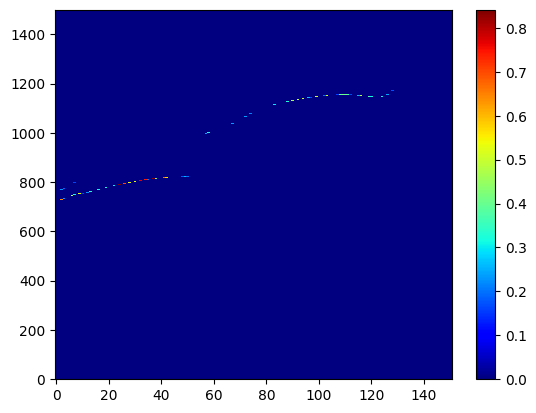

In [3]:
X,Y=np.meshgrid(x,y)
plt.pcolormesh(Y,X,yp_preds[0,:,:,0].reshape(1501,151).T,cmap='jet')
plt.colorbar(orientation='vertical')

In [2]:
print(right)

50
